# Introducción al Periodismo de Datos

Taller gratuito organizado por el Instituto Humai

www.ihum.ai

Autores: Pablo Labarta, Matías Grinberg

---



<a href="https://colab.research.google.com/github/institutohumai/talleres/blob/master/Taller_Periodismo.ipynb"> <img src='https://colab.research.google.com/assets/colab-badge.svg' /> </a>

Contenidos:

- Para qué quiere programar un periodista
- Qué es Python, por qué Python (usado en datos, etc)
- Qué es Colab 
- Declarar Variables
- Funciones
- HTML
- Regex
- Librerías
- WordCloud

## Para qué programar

- Poder hacer más
- Autonomía e independencia
- Capacidad de innovación



## Aprendiendo a Programar

- Un lenguaje, pero no es ambiguo
- Práctica, práctica, práctica
- El código se lee más veces de las que se escribe
- El código puede ser "bello"

# Por qué Python

- Uno de los lenguajes más usados
- Es simple
- Muchas librerías dedicadas a obtener, analizar y visualizar datos

In [ ]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


# Qué es Colab

Google Colab es una herramienta muy similar a Docs, pero para armar estos documentos interactivos donde no solo podemos escribir texto, sino también escribir y *correr* código. En este caso vamos a estar usando Colab con Python.

Cómo usar Colab para el taller:
1. Abrir el link que está en el chat
2. Ir al menú de arriba, donde dice File/Archivo y hacer una copia en Drive.
3. Se les va a abrir el nuevo documento y ese lo pueden modificar todo lo que quieran y ejecutar las celdas que tienen código.

# Creando un programa

- Variables
- Funciones
- Librerias

# Variables
Las variables son valores que pueden cambiar dependiendo de la información o condiciones que le demos a nuestro programa. En Python le asignamos un valor a una variable con el signo "=".

`variable1 = 1`

In [ ]:
link = 'https://www.lanacion.com.ar/sociedad/solidaria-hizo-pedido-le-robaron-bici-al-nid2449124'
link2 = 'https://www.lanacion.com.ar'

In [ ]:
print(link2)

https://www.lanacion.com.ar


# Metodos

En Python casi todo es un "objeto" y los objetos pueden tener métodos. El objeto String, las seguidillas de caracteres o simplemente texto, tiene un metodo llamado "split" que nos permite cortar el texto cada vez que aparece el caracter que le indicamos y nos devuelve una lista, otra clase de objeto.


In [ ]:
link.split('/')

['https:',
 '',
 'www.lanacion.com.ar',
 'sociedad',
 'solidaria-hizo-pedido-le-robaron-bici-al-nid2449124']

# Funciones

Las funciones son bloques de código organizado y reutilizable que se usan para ejecutar una acción. Las funciones primero se definen y luego se usan.

In [ ]:
def codigo_noticia(link):
    return link.split('/')[-1]

In [ ]:
codigo_noticia(link)

'solidaria-hizo-pedido-le-robaron-bici-al-nid2449124'

# Importar funciones de librerias

Si esta fuera una función de una librería, la importaríamos así:

```python
from periodismo import codigo_noticia
```

# Instalar librerias

In [ ]:
!pip install bs4

In [ ]:
# Importamos una libreria para HTTP
import requests
# Importamos una libreria para trabajar con expresiones regulares
import re
# Importar libreria para leer HTML
from bs4 import BeautifulSoup

# Expresiones regulares

Son secuencias de caracteres que conforman un patrón de búsqueda. Se utilizan principalmentes para la búsqueda de patrones de cadenas de caracteres u operaciones de sustituciones.

Las expresiones regulares son patrones utilizados para encontrar una determinada combinación de caracteres dentro de una cadena de texto. Las expresiones regulares proporcionan una manera muy flexible de buscar o reconocer cadenas de texto.

In [ ]:
sitio = requests.get(link)
print(sitio.content)

b'<!DOCTYPE html>\r\n<html lang="es">\r\n<head>\r\n\r\n    <link href="/favicon.ico" rel="icon" type="image/x-icon" />\r\n    <meta charset="utf-8" />\r\n    <meta http-equiv="X-UA-Compatible" content="IE=edge" />\r\n\r\n<meta name="theme-color" content="#ffffff" />\r\n<link rel="manifest" href="/manifest.json"><link rel="dns-prefetch" href="//static.glanacion.com">\r\n<link rel="dns-prefetch" href="//cdn.livefyre.com">\r\n<link rel="dns-prefetch" href="//bucket.glanacion.com">\r\n<link rel="dns-prefetch" href="//bucket1.glanacion.com">\r\n<link rel="dns-prefetch" href="//bucket2.glanacion.com">\r\n<link rel="dns-prefetch" href="//bucket3.glanacion.com">\r\n<link rel="dns-prefetch" href="//ingresar.lanacion.com.ar">\r\n<link rel="dns-prefetch" href="//api-ingresar.lanacion.com.ar">\r\n<link rel="dns-prefetch" href="//api-paywall.lanacion.com.ar">\r\n<link rel="dns-prefetch" href="//wsresultados.lanacion.com.ar">\r\n<link rel="dns-prefetch" href="//api-contenidos.lanacion.com.ar">\r\n<l

In [ ]:
def extraer_parrafos(link):

    # Vamos al link
    r = requests.get(link)
    
    # Nos quedamos con la parte que contiene el texto
    cuerpo = r.text.split('nota-cuerpo')[1]

    # Buscamos los parrafos
    parrafos = re.findall('p>([\s\S]*?)<', cuerpo)
    # Sacamos los espacios del ppio y final
    parrafos = [p.strip() for p in parrafos]
    # Borramos los vacios
    parrafos = [p for p in parrafos if len(p) > 0]
  
    return parrafos

In [ ]:
# Misma funcion pero con BeautifulSoup
def extraer_parrafos(link):
    # Vamos al link
    r = requests.get(link)
    # print(r.text)
    soup = BeautifulSoup(r.text, 'html.parser')
    # print(soup)
    # Buscamos los parrafos
    cuerpo = soup.find(id='cuerpo')
    parrafos = cuerpo.find_all('p')
    # Agarramos solo el texto de cada parrafo y le sacamos \r y \n que definen nuevas lineas
    parrafos = [p.text.replace("\r","").replace("\n","") for p in parrafos]
  
    return parrafos

In [ ]:
parrafos = extraer_parrafos(link)
parrafos

['Según trascendió, ayer por la noche',
 '"Le robaron hace minutos una bicicleta a un repartidor de Rappi en Pellegrini y Ayacucho. ¡La chica que iba a recibir su pedido le regaló la suya para que pueda seguir trabajando!',
 'La publicación se llenó de comentarios de personas que elogiaron la actitud de la mujer y que destacaron la',
 'Copyright 2020 SA LA NACION | Todos los derechos reservados']

In [ ]:
# Volvemos a unir todos los parrafos para tener el articulo
texto = ''.join(parrafos)
print(texto)

Según trascendió, ayer por la noche"Le robaron hace minutos una bicicleta a un repartidor de Rappi en Pellegrini y Ayacucho. ¡La chica que iba a recibir su pedido le regaló la suya para que pueda seguir trabajando!La publicación se llenó de comentarios de personas que elogiaron la actitud de la mujer y que destacaron laCopyright 2020 SA LA NACION | Todos los derechos reservados


In [ ]:
# Qué pasa si separamos las palabras con split?

texto.split()

['Según',
 'trascendió,',
 'ayer',
 'por',
 'la',
 'noche"Le',
 'robaron',
 'hace',
 'minutos',
 'una',
 'bicicleta',
 'a',
 'un',
 'repartidor',
 'de',
 'Rappi',
 'en',
 'Pellegrini',
 'y',
 'Ayacucho.',
 '¡La',
 'chica',
 'que',
 'iba',
 'a',
 'recibir',
 'su',
 'pedido',
 'le',
 'regaló',
 'la',
 'suya',
 'para',
 'que',
 'pueda',
 'seguir',
 'trabajando!La',
 'publicación',
 'se',
 'llenó',
 'de',
 'comentarios',
 'de',
 'personas',
 'que',
 'elogiaron',
 'la',
 'actitud',
 'de',
 'la',
 'mujer',
 'y',
 'que',
 'destacaron',
 'laCopyright',
 '2020',
 'SA',
 'LA',
 'NACION',
 '|',
 'Todos',
 'los',
 'derechos',
 'reservados']

In [ ]:
# Tokenizar

# /w+ Cualquier caracter alfanumerico

tokens = re.findall('\w+', texto)
tokens[:10]

['Es',
 'un',
 'rincón',
 'del',
 'mundo',
 'con',
 'ciudades',
 'abarrotadas',
 'donde',
 'hay']

# Diccionarios

Un diccionario es otra forma de estructurar nuestros datos y son un poco más complejos que las listas que venimos usando hasta ahora. Los diccionarios son listados de "claves" o "keys" y valores. Las claves son el nombre de la sección, si fuese un cajón sería como la etiqueta que tiene y el valor puede ser cualquier cosa que queramos poner ahí: un string, un número, una lista y hasta otro diccionario.

Vamos a usar un diccionario para armar una función sencilla que cuente las palabras del artículo.

In [ ]:
# visualizar frecuencia de palabras
def contar_frecuencia(palabras):
  indice = {}

  for palabra in palabras:
      if palabra in indice:
          indice[palabra] += 1
      else:
          indice[palabra] = 1

  return indice

In [ ]:
dict_palabras = contar_frecuencia(tokens)
print(dict_palabras)

{'Es': 3, 'un': 20, 'rincón': 1, 'del': 17, 'mundo': 5, 'con': 9, 'ciudades': 1, 'abarrotadas': 2, 'donde': 3, 'hay': 1, 'poca': 1, 'higiene': 1, 'y': 20, 'en': 33, 'ciertas': 1, 'comunidades': 3, 'es': 7, 'imposible': 1, 'poner': 2, 'práctica': 2, 'el': 24, 'distanciamiento': 2, 'social': 2, 'las': 13, 'familias': 1, 'son': 3, 'numerosas': 1, 'suelen': 1, 'compartir': 1, 'una': 6, 'sola': 1, 'habitación': 1, 'Durante': 1, 'meses': 4, 'los': 21, 'expertos': 5, 'salud': 2, 'estuvieron': 1, 'advirtiendo': 1, 'sobre': 3, 'la': 30, 'probabilidad': 1, 'de': 58, 'que': 32, 'condiciones': 2, 'vida': 1, 'urbanas': 1, 'pobres': 2, 'África': 9, 'contribuyan': 1, 'a': 18, 'rápida': 1, 'propagación': 1, 'coronavirus': 3, 'La': 7, 'densidad': 1, 'población': 3, 'factor': 4, 'clave': 1, 'Si': 1, 'no': 5, 'se': 18, 'tiene': 2, 'capacidad': 1, 'virus': 4, 'va': 1, 'propagar': 1, 'indica': 1, 'profesor': 3, 'Salim': 1, 'Abdool': 1, 'Karim': 4, 'presidente': 2, 'comité': 2, 'asesor': 2, 'ministerial': 2

In [ ]:
# Ordenar la lista de menor a mayor para ver que tenemos
# Ver si podemos refactorear para que se más clara
# Se puede sacar el reverse y el lambda?

ordenado = sorted(dict_palabras.items(), 
                  # lambda son pequeñas funciones que usamos en el momento
                  # esta recibe x que es el par key,value del diccionario y devuelve solo el valor
                  key= lambda x: x[1],
                  # invertimos la lista para tener las más usadas arriba
                  reverse=True)

In [ ]:
ordenado[:20]

[('de', 58),
 ('en', 33),
 ('que', 32),
 ('la', 30),
 ('el', 24),
 ('los', 21),
 ('un', 20),
 ('y', 20),
 ('a', 18),
 ('se', 18),
 ('del', 17),
 ('las', 13),
 ('más', 11),
 ('por', 10),
 ('podría', 10),
 ('con', 9),
 ('África', 9),
 ('continente', 9),
 ('es', 7),
 ('La', 7)]

In [ ]:
# Descargamos una librería
# Instalar una libreria con pip
!pip install wordcloud

# Importamos matplotlib, la libreria para graficos
import matplotlib.pyplot as plt
# Importamos una libreria para hacer nubes de palabras
from wordcloud import WordCloud

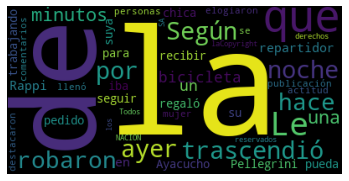

In [ ]:
wordcloud = WordCloud().generate(texto)

# Mostramos el WordCloud
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
# Descargamos lista de palabras comunes

palabras_comunes = requests.get('https://github.com/Alir3z4/stop-words/raw/master/spanish.txt').text
palabras_comunes = palabras_comunes.split('\n')
print(palabras_comunes)

['a', 'al', 'algo', 'algunas', 'algunos', 'ante', 'antes', 'como', 'con', 'contra', 'cual', 'cuando', 'de', 'del', 'desde', 'donde', 'durante', 'e', 'el', 'ella', 'ellas', 'ellos', 'en', 'entre', 'era', 'erais', 'eran', 'eras', 'eres', 'es', 'esa', 'esas', 'ese', 'eso', 'esos', 'esta', 'estaba', 'estabais', 'estaban', 'estabas', 'estad', 'estada', 'estadas', 'estado', 'estados', 'estamos', 'estando', 'estar', 'estaremos', 'estará', 'estarán', 'estarás', 'estaré', 'estaréis', 'estaría', 'estaríais', 'estaríamos', 'estarían', 'estarías', 'estas', 'este', 'estemos', 'esto', 'estos', 'estoy', 'estuve', 'estuviera', 'estuvierais', 'estuvieran', 'estuvieras', 'estuvieron', 'estuviese', 'estuvieseis', 'estuviesen', 'estuvieses', 'estuvimos', 'estuviste', 'estuvisteis', 'estuviéramos', 'estuviésemos', 'estuvo', 'está', 'estábamos', 'estáis', 'están', 'estás', 'esté', 'estéis', 'estén', 'estés', 'fue', 'fuera', 'fuerais', 'fueran', 'fueras', 'fueron', 'fuese', 'fueseis', 'fuesen', 'fueses', 'fu

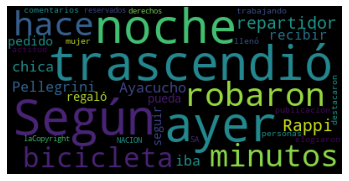

In [ ]:
wordcloud = WordCloud(stopwords=palabras_comunes).generate(texto)

# Mostramos el WordCloud
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
def analizar(link):

  # Bajar texto
  parrafos = extraer_parrafos(link)
  
  texto = '\n'.join(parrafos)

  # Mostrar WordCloud

  wordcloud = WordCloud(stopwords=palabras_comunes).generate(texto)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.show()

  # Devolver frecuencias
  dict_palabras = contar_frecuencia(tokens)

  return dict_palabras

In [ ]:
def get_links_nacion():
  link_base = 'https://www.lanacion.com.ar'
  
  # Vamos al sitio
  r = requests.get(link)

  # Extraemos links
  links = re.findall('href="(.+?)"', r.text)
  
  # Filtramos los que son noticias
  links = [l for l in links if 'nid' in l and l[-1].isdigit()]
  
  # Borramos repetidos y le agregamos el prefijo
  links = list(set([link_base+l for l in links if 'lanacion' not in l]))

  return links

In [ ]:
links = get_links_nacion()
links

['https://www.lanacion.com.ar/sociedad/en-detalle-infectados-fallecidos-coronavirus-argentina-nid2350330',
 'https://www.lanacion.com.ar/sociedad/aca-viven-presente-es-holandes-se-enamoro-nid2444528',
 'https://www.lanacion.com.ar/lifestyle/memes-cuarentena-coronavirus-nid2384130',
 'https://www.lanacion.com.ar/espectaculos/yanina-nid2454190',
 'https://www.lanacion.com.ar/espectaculos/jimena-cyrulnik-se-prepara-primavera-transparencias-bikini-nid2453091',
 'https://www.lanacion.com.ar/sociedad/panamericana-corte-total-manifestacion-nid2454193',
 'https://www.lanacion.com.ar/espectaculos/ashley-tisdale-estrella-high-school-musical-esta-nid2454172']

In [ ]:
links = ['https://www.lanacion.com.ar/sociedad/coronavirus-grafico-muestra-riesgo-contagio-segun-actividad-nid2444187',
          'https://www.lanacion.com.ar/sociedad/coronavirus-argentina-12027-contagios-argentina-paso-medio-nid2444390',
          'https://www.lanacion.com.ar/seguridad/cacerolazo-en-apoyo-al-reclamo-de-la-policia-bonaerense-nid2444516',
          'https://www.lanacion.com.ar/sociedad/en-detalle-infectados-fallecidos-coronavirus-argentina-nid2350330',
          'https://www.lanacion.com.ar/seguridad/protesta-policial-que-dice-petitorio-le-entregaron-nid2444373',
          'https://www.lanacion.com.ar/sociedad/vacuna-oxford-que-significa-se-frene-estudio-nid2444412']

https://www.lanacion.com.ar/sociedad/en-detalle-infectados-fallecidos-coronavirus-argentina-nid2350330
Error en este link!
https://www.lanacion.com.ar/sociedad/aca-viven-presente-es-holandes-se-enamoro-nid2444528


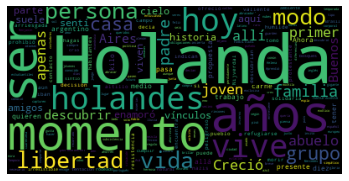

https://www.lanacion.com.ar/lifestyle/memes-cuarentena-coronavirus-nid2384130


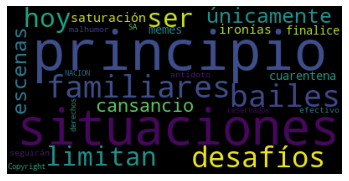

https://www.lanacion.com.ar/espectaculos/yanina-nid2454190


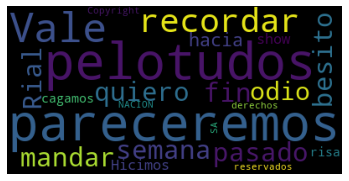

https://www.lanacion.com.ar/espectaculos/jimena-cyrulnik-se-prepara-primavera-transparencias-bikini-nid2453091


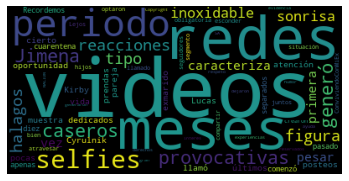

https://www.lanacion.com.ar/sociedad/panamericana-corte-total-manifestacion-nid2454193


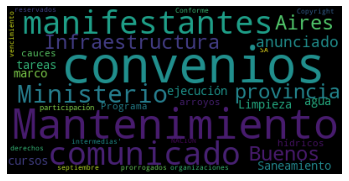

https://www.lanacion.com.ar/espectaculos/ashley-tisdale-estrella-high-school-musical-esta-nid2454172


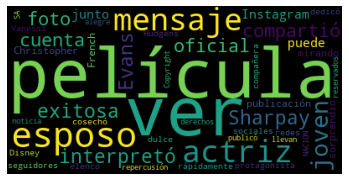

In [ ]:
for link in links:
  try:
    print(link)
    diccionario = analizar(link)
  except:
    print('Error en este link!')